In [3]:
import torch

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [293]:
import numpy as np
import pandas as pd
import os


DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')
validation_data_path = os.path.join(DATA_PATH, 'validation.csv')

df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)
df_validation = pd.read_csv(validation_data_path, keep_default_na=False)

text = df_train['text']
label = df_train['sentiment']

# --------------------------------------

# GloVe

### get embedding dictionary 

In [188]:
from scipy import spatial
import matplotlib.pyplot as plt
from sklear### get embedding dictionary n.manifold import TSNE

In [450]:
embeddings_dict = {}
glove_word_lst = []

# dimention 300
with open("glove.6B/glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        glove_word_lst.append(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [315]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))



In [483]:
lst_good = find_closest_embeddings(embeddings_dict['E '])
lst_bad = find_closest_embeddings(embeddings_dict['bad'])

In [484]:
print(lst_good[:10])
print(lst_bad[:10])

['good', 'better', 'well', 'always', 'really', 'sure', 'way', 'so', 'but', 'excellent']
['bad', 'unfortunately', 'worse', 'good', 'because', 'things', 'thing', 'nothing', 'maybe', 'actually']


In [324]:
import random

lst_v = []
lst_word = []
lst_j = []
for i in range(1000):
    j = random.randint(0,len(embeddings_dict))
    while j in lst_j:
        j = random.randint(0,len(embeddings_dict))
    lst_j.append(j)
    lst_v.append(embeddings_dict[glove_word_lst[j]][:2])
    lst_word.append(glove_word_lst[j])
    

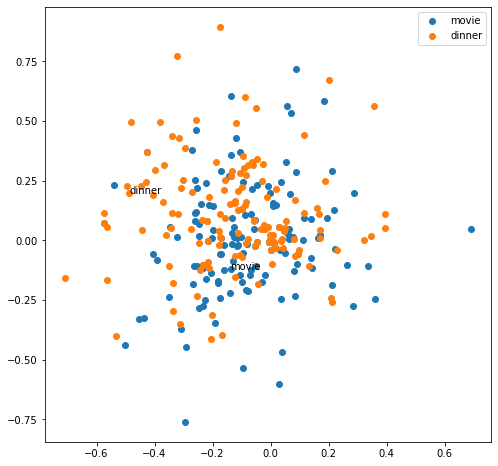

In [456]:
x1 = [embeddings_dict[i][0] for i in lst_good[:150]]
y1 = [embeddings_dict[i][1] for i in lst_good[:150]]
x2 = [embeddings_dict[i][0] for i in lst_bad[:150]]
y2 = [embeddings_dict[i][1] for i in lst_bad[:150]]
plt.figure(figsize=(8,8))
plt.scatter(x1, y1, label='movie')
plt.annotate(lst_good[0], xy=(x1[0],y1[0]))
plt.scatter(x2, y2, label='dinner')
plt.annotate(lst_bad[0], xy=(x2[0],y2[0]))
plt.legend(loc=1)
# plt.savefig('compare_3.jpg')

In [373]:
embeddings_dict['good'][0]

-0.35586

### preprocessing 

In [191]:
import numpy as np
import pandas as pd

In [192]:
import os
DATA_PATH = os.path.join(os.getcwd(), 'data')
test_data_path = os.path.join(DATA_PATH, 'test.csv')
train_data_path = os.path.join(DATA_PATH, 'train.csv')

In [193]:
df_train = pd.read_csv(train_data_path, keep_default_na=False)
df_test = pd.read_csv(test_data_path, keep_default_na=False)

In [294]:
def map_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    else:
        return 2
    
df_train['class'] = df_train['sentiment'].map(map_sentiment)
df_test['class'] = df_test['sentiment'].map(map_sentiment)
df_validation['class'] = df_validation['sentiment'].map(map_sentiment)

In [509]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['text'])
dic_words = vectorizer.vocabulary_

print(len(dic_words))

21483


In [493]:
# take pre-trained glove vector

def map_tovector(text):
    lst_text = text.lower().split()
    vec = np.array([0 for i in range(300)], "float32")
    lenth = 0
    for i in lst_text:
        if i in embeddings_dict:
            vec += embeddings_dict[i]
            lenth += 1
        else:
            continue
#     vec = sum(embeddings_dict[i] for i in lst_text if i in embeddings_dict)
    if lenth != 0:
        vec /= lenth
    return vec

def map_tovector(text):
    lst_text = text.lower().split()
    vec = np.array([0 for i in range(300)], "float32")
    lenth = 0
    for i in lst_text:
        if i in embeddings_dict and i in high_tf_dict:
            lenth += 1
            vec += embeddings_dict[i]
        else:
            continue
#     vec = sum(embeddings_dict[i] for i in lst_text if i in embeddings_dict)
    if lenth != 0:
        vec /= lenth
    return vec

df_train['glove'] = df_train['text'].map(map_tovector)
df_test['glove'] = df_test['text'].map(map_tovector)
df_validation['glove'] = df_validation['text'].map(map_tovector)

In [278]:
print(list(map_tovector(df_train['text'][0])))

[0.06608714, 0.16590129, -0.19746284, -0.16454728, -0.12608144, 0.14521416, -0.4844957, -0.04652671, 0.12417572, 0.40823147, 0.034897, 0.156866, 0.18766971, -0.05624514, 0.028246101, 0.24374615, -0.20636956, 0.43671998, 0.14897387, -0.18453857, 0.17968872, 2.2541142, -0.15575828, -0.13872315, 0.06196814, -0.16802958, -0.057896577, -0.026637137, -0.029684871, -0.11381858, -0.041487005, -0.14217386, -0.06520967, -0.08595143, -0.088248, -0.19694285, -0.49829856, -0.27162144, 0.078672715, 0.27113143, 0.12421386, -0.120596565, -0.061501853, 0.2288617, -0.13369928, 0.09629146, 0.51625, -0.16815543, 0.034517426, -0.009968144, 0.027977142, 0.011311235, -0.19278857, 0.34482002, 0.21669802, -0.14304145, -0.018553885, -0.16295342, -0.15564586, 0.023347858, 0.15477872, 0.08958256, -0.12724, 0.021975994, 0.15478286, -0.11984714, -0.24831857, 0.28418145, 0.08199299, 0.0463263, 0.30258211, -0.070410006, -0.0219897, 0.022963284, -0.18211958, -0.092321, -0.3758576, -0.044823, -0.17284186, -0.08260486, 

In [241]:
df_train.head(20)
df_train['glove'][0].shape
print(df_train['glove'][0])
print(type(df_train['glove'][0]))

[ 0.05363443  0.3439929   0.2495264  -0.41508287 -0.37565717  0.11606357
  0.00329843  0.2888871   0.02240371 -0.14980043  0.29238716  0.23628
  0.42353716  0.13769357  0.06161614 -0.37598857 -0.10871     0.30478573
 -0.6002757   0.233234    0.3185777   0.28993002  0.2094157  -0.07419001
  0.03748918 -0.03920856 -0.03958857 -0.3963516   0.14606099 -0.27010956
  0.10554713  0.29267716  0.05258429  0.15083     0.25097355  0.23539786
 -0.04922929  0.3053017   0.104694   -0.18899772 -0.36178854 -0.20223959
  0.10513185 -0.39906713 -0.15013    -0.069517    0.2374157  -0.26868442
  0.05305714 -0.8806043   0.05508829 -0.11216528  0.05484614  0.8750485
 -0.1509757  -1.6988144   0.08182572  0.06088128  1.1106001   0.66927433
 -0.20822285  0.76681286 -0.47544146  0.15037961  0.72004426  0.11217243
  0.47961146  0.40831003 -0.14689757 -0.170948    0.08487172 -0.3882628
  0.00314257 -0.3704643  -0.02007829  0.054094   -0.06847057  0.095497
 -0.6837629  -0.02744672  0.45684144 -0.16994815 -0.532791

In [494]:
# X_train = []
# for i in df_train['vector']:
#     X_train.append(list(i))
# X_train = np.array(X_train)
X_train = np.array([i for i in df_train['glove']])
X_test = np.array([i for i in df_test['glove']])
X_validation = np.array([i for i in df_validation['glove']])
y_train = np.array(df_train['class'])
y_test = np.array(df_test['class'])
y_validation = np.array(df_validation['class'])

### SVM

In [314]:
from sklearn import svm
import datetime

acc = []
print('start time: %s' % datetime.datetime.now())
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print('end time: %s' % datetime.datetime.now())

start time: 2020-12-17 19:29:41.079508
0.6332419796872482
end time: 2020-12-17 19:33:18.223505


## TF-IDF + GloVe

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [505]:
def TF_IDF_data(threshold):
    vectorizer = TfidfVectorizer(max_features=threshold)
    X_train = vectorizer.fit_transform(df_train['text']).toarray()
    X_test = vectorizer.transform(df_test['text']).toarray()
    X_validation = vectorizer.transform(df_validation['text']).toarray()
    y_train = df_train['class']
    y_test = df_test['class']
    y_validation = df_validation['class']
    return X_train, y_train, X_test, y_test, X_validation, y_validation

In [504]:
X_train, y_train, X_test, y_test, X_validation, y_validation = TF_IDF_data(100)
glove_train = np.array([i for i in df_train['glove']])
glove_test = np.array([i for i in df_test['glove']])
glove_validation = np.array([i for i in df_validation['glove']])
X_train = np.hstack((X_train, glove_train))
X_test = np.hstack((X_test, glove_test))
X_validation = np.hstack((X_validation, glove_validation))

In [233]:
X_train[2131]

array([ 0.00000000e+00,  0.00000000e+00,  5.21172714e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.56222255e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.78309528e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.37159854e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.60029330e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

### SVM

In [219]:
from sklearn import svm
import datetime

print('start time: %s' % datetime.datetime.now())
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print('end time: %s' % datetime.datetime.now())

start time: 2020-12-11 19:16:50.171664
0.6086587436332768
end time: 2020-12-11 19:21:07.021147


### logistic regression

In [506]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# G+T
lst_threshold = [200*i for i in range(1,26)]
# lst_threshold = [8000]
acc = []
for threshold in lst_threshold:
    print('start time: %s' % datetime.datetime.now())
    print('threshold: %s' % threshold)
    X_train, y_train, X_test, y_test, X_validation, y_validation = TF_IDF_data(threshold)
    glove_train = np.array([i for i in df_train['glove']])
    glove_test = np.array([i for i in df_test['glove']])
    X_train = np.hstack((X_train, glove_train))
    X_test = np.hstack((X_test, glove_test))
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))
    print('accuracy: %s' % acc[-1])
    print('end time: %s' % datetime.datetime.now())

start time: 2020-12-18 11:19:08.871013
threshold: 200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.651942608415283
end time: 2020-12-18 11:19:10.518414
start time: 2020-12-18 11:19:10.518450
threshold: 400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6672577784942769
end time: 2020-12-18 11:19:12.514066
start time: 2020-12-18 11:19:12.514099
threshold: 600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6743511204256005
end time: 2020-12-18 11:19:15.238720
start time: 2020-12-18 11:19:15.238761
threshold: 800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6782202160245042
end time: 2020-12-18 11:19:18.787271
start time: 2020-12-18 11:19:18.787309
threshold: 1000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.681605674673545
end time: 2020-12-18 11:19:22.948225
start time: 2020-12-18 11:19:22.948262
threshold: 1200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6812832500403031
end time: 2020-12-18 11:19:27.395913
start time: 2020-12-18 11:19:27.395956
threshold: 1400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.682089311623408
end time: 2020-12-18 11:19:32.508221
start time: 2020-12-18 11:19:32.508258
threshold: 1600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6787038529743672
end time: 2020-12-18 11:19:37.739689
start time: 2020-12-18 11:19:37.739721
threshold: 1800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6790262776076093
end time: 2020-12-18 11:19:42.974231
start time: 2020-12-18 11:19:42.974262
threshold: 2000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6853135579558278
end time: 2020-12-18 11:19:48.868923
start time: 2020-12-18 11:19:48.868953
threshold: 2200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6795099145574722
end time: 2020-12-18 11:19:55.132890
start time: 2020-12-18 11:19:55.132920
threshold: 2400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6788650652909882
end time: 2020-12-18 11:20:01.850887
start time: 2020-12-18 11:20:01.850920
threshold: 2600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6775753667580203
end time: 2020-12-18 11:20:09.048435
start time: 2020-12-18 11:20:09.048462
threshold: 2800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6741899081089795
end time: 2020-12-18 11:20:16.843961
start time: 2020-12-18 11:20:16.843990
threshold: 3000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6761244559084314
end time: 2020-12-18 11:20:24.763431
start time: 2020-12-18 11:20:24.763479
threshold: 3200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6762856682250524
end time: 2020-12-18 11:20:33.172941
start time: 2020-12-18 11:20:33.172978
threshold: 3400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6724165726261486
end time: 2020-12-18 11:20:42.247543
start time: 2020-12-18 11:20:42.247572
threshold: 3600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6769305174915363
end time: 2020-12-18 11:20:51.846501
start time: 2020-12-18 11:20:51.846534
threshold: 3800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6788650652909882
end time: 2020-12-18 11:21:01.718028
start time: 2020-12-18 11:21:01.718131
threshold: 4000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6769305174915363
end time: 2020-12-18 11:21:12.451343
start time: 2020-12-18 11:21:12.451397
threshold: 4200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6796711268740931
end time: 2020-12-18 11:21:23.434660
start time: 2020-12-18 11:21:23.434693
threshold: 4400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6745123327422216
end time: 2020-12-18 11:21:34.544522
start time: 2020-12-18 11:21:34.544558
threshold: 4600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6780590037078833
end time: 2020-12-18 11:21:46.604123
start time: 2020-12-18 11:21:46.604155
threshold: 4800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.682572948573271
end time: 2020-12-18 11:21:59.382596
start time: 2020-12-18 11:21:59.382631
threshold: 5000
accuracy: 0.6793487022408512
end time: 2020-12-18 11:22:12.528875


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [499]:

# T
lst_threshold = [200*i for i in range(1,26)]
# lst_threshold = [8000]
acc1 = []
for threshold in lst_threshold:
    print('start time: %s' % datetime.datetime.now())
    print('threshold: %s' % threshold)
    X_train, y_train, X_test, y_test, X_validation, y_validation = TF_IDF_data(threshold)
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    acc1.append(model.score(X_test, y_test))
    print('accuracy: %s' % acc1[-1])
    print('end time: %s' % datetime.datetime.now())

start time: 2020-12-18 11:08:34.553261
threshold: 200
accuracy: 0.6151862002256973
end time: 2020-12-18 11:08:35.758898
start time: 2020-12-18 11:08:35.758954
threshold: 400
accuracy: 0.651136546832178
end time: 2020-12-18 11:08:37.200465
start time: 2020-12-18 11:08:37.200491
threshold: 600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6683862647106239
end time: 2020-12-18 11:08:39.104230
start time: 2020-12-18 11:08:39.104268
threshold: 800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6793487022408512
end time: 2020-12-18 11:08:41.340462
start time: 2020-12-18 11:08:41.340489
threshold: 1000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6861196195389327
end time: 2020-12-18 11:08:44.169627
start time: 2020-12-18 11:08:44.169660
threshold: 1200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6895050781879736
end time: 2020-12-18 11:08:47.526371
start time: 2020-12-18 11:08:47.526410
threshold: 1400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6920844752539094
end time: 2020-12-18 11:08:51.004883
start time: 2020-12-18 11:08:51.004911
threshold: 1600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6949862969530872
end time: 2020-12-18 11:08:55.150860
start time: 2020-12-18 11:08:55.150916
threshold: 1800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6940190230533613
end time: 2020-12-18 11:09:00.095341
start time: 2020-12-18 11:09:00.095372
threshold: 2000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6938578107367402
end time: 2020-12-18 11:09:05.518161
start time: 2020-12-18 11:09:05.518198
threshold: 2200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6954699339029502
end time: 2020-12-18 11:09:11.883714
start time: 2020-12-18 11:09:11.883744
threshold: 2400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6948250846364662
end time: 2020-12-18 11:09:18.855450
start time: 2020-12-18 11:09:18.855489
threshold: 2600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6911172013541834
end time: 2020-12-18 11:09:25.865596
start time: 2020-12-18 11:09:25.865624
threshold: 2800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6933741737868773
end time: 2020-12-18 11:09:32.811078
start time: 2020-12-18 11:09:32.811108
threshold: 3000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6925681122037723
end time: 2020-12-18 11:09:40.780855
start time: 2020-12-18 11:09:40.780886
threshold: 3200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6920844752539094
end time: 2020-12-18 11:09:48.957555
start time: 2020-12-18 11:09:48.957582
threshold: 3400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6904723520876995
end time: 2020-12-18 11:09:57.934803
start time: 2020-12-18 11:09:57.934835
threshold: 3600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6914396259874255
end time: 2020-12-18 11:10:07.081784
start time: 2020-12-18 11:10:07.081809
threshold: 3800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6917620506206674
end time: 2020-12-18 11:10:16.699796
start time: 2020-12-18 11:10:16.699822
threshold: 4000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6916008383040464
end time: 2020-12-18 11:10:26.253487
start time: 2020-12-18 11:10:26.253513
threshold: 4200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6932129614702564
end time: 2020-12-18 11:10:36.512822
start time: 2020-12-18 11:10:36.512848
threshold: 4400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6912784136708044
end time: 2020-12-18 11:10:47.269630
start time: 2020-12-18 11:10:47.269670
threshold: 4600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6933741737868773
end time: 2020-12-18 11:10:58.647612
start time: 2020-12-18 11:10:58.647640
threshold: 4800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6917620506206674
end time: 2020-12-18 11:11:10.160901
start time: 2020-12-18 11:11:10.160928
threshold: 5000
accuracy: 0.6911172013541834
end time: 2020-12-18 11:11:22.674745


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [496]:

# G
lst_threshold = [200*i for i in range(1,26)]
# lst_threshold = [8000]
acc2 = []
for threshold in lst_threshold:
    print('start time: %s' % datetime.datetime.now())
    print('threshold: %s' % threshold)
    X_train, y_train, X_test, y_test, X_validation, y_validation = TF_IDF_data(threshold)
    X_train = np.array([i for i in df_train['glove']])
    X_test = np.array([i for i in df_test['glove']])
    X_validation = np.array([i for i in df_validation['glove']])
    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)
    acc2.append(model.score(X_test, y_test))
    print('accuracy: %s' % acc2[-1])
    print('end time: %s' % datetime.datetime.now())

start time: 2020-12-18 11:04:22.759186
threshold: 200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:24.115411
start time: 2020-12-18 11:04:24.115442
threshold: 400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:25.408481
start time: 2020-12-18 11:04:25.408507
threshold: 600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:26.753938
start time: 2020-12-18 11:04:26.753965
threshold: 800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:28.229899
start time: 2020-12-18 11:04:28.229926
threshold: 1000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:29.702272
start time: 2020-12-18 11:04:29.702298
threshold: 1200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:31.059515
start time: 2020-12-18 11:04:31.059541
threshold: 1400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:32.424364
start time: 2020-12-18 11:04:32.424389
threshold: 1600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:33.812371
start time: 2020-12-18 11:04:33.812401
threshold: 1800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:35.260554
start time: 2020-12-18 11:04:35.260581
threshold: 2000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:36.764235
start time: 2020-12-18 11:04:36.764269
threshold: 2200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:38.429723
start time: 2020-12-18 11:04:38.429756
threshold: 2400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:40.120095
start time: 2020-12-18 11:04:40.120315
threshold: 2600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:41.740745
start time: 2020-12-18 11:04:41.740777
threshold: 2800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:43.394439
start time: 2020-12-18 11:04:43.394471
threshold: 3000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:44.928310
start time: 2020-12-18 11:04:44.928336
threshold: 3200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:46.497370
start time: 2020-12-18 11:04:46.497403
threshold: 3400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:48.013155
start time: 2020-12-18 11:04:48.013189
threshold: 3600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:49.535328
start time: 2020-12-18 11:04:49.535355
threshold: 3800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:51.054727
start time: 2020-12-18 11:04:51.054753
threshold: 4000


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:52.598399
start time: 2020-12-18 11:04:52.598439
threshold: 4200


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:54.222940
start time: 2020-12-18 11:04:54.222972
threshold: 4400


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:55.806245
start time: 2020-12-18 11:04:55.806278
threshold: 4600


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:57.369550
start time: 2020-12-18 11:04:57.369576
threshold: 4800


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.6040625503788489
end time: 2020-12-18 11:04:58.953148
start time: 2020-12-18 11:04:58.953177
threshold: 5000
accuracy: 0.6040625503788489
end time: 2020-12-18 11:05:00.547529


/Users/travistpcc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


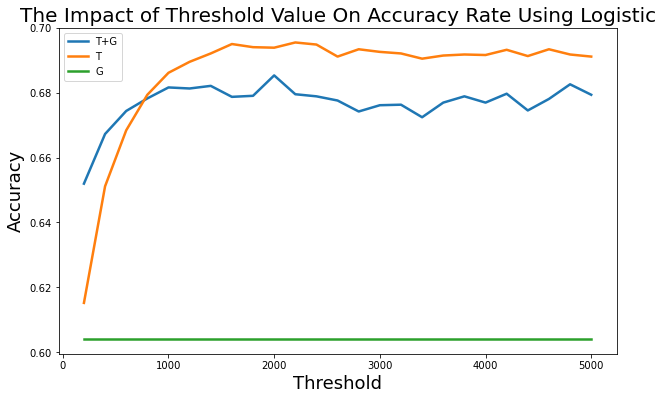

In [501]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lst_threshold, acc, linewidth=2.5, label='T+G')
plt.plot(lst_threshold, acc1, linewidth=2.5, label='T')
plt.plot(lst_threshold, acc2, linewidth=2.5, label='G')
plt.xlabel('Threshold', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('The Impact of Threshold Value On Accuracy Rate Using Logistic', fontsize=20)
plt.legend(loc=2)
# plt.savefig('T&G+G+T')
plt.show()